<a href="https://colab.research.google.com/github/chrisalpuerto/Bball-shot-Detection/blob/main/HoopDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Player Detection Using YOLOv8
In this session I will be creating a player detection model using YOLOv8



In [5]:
!pip install ultralytics roboflow kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [6]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 78.4MB/s]


In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="kSbyldBcppeFTfZOiAQr")
project = rf.workspace("train-apozl").project("basketball-hoop-detection-bcxld-yphlb")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Basketball-Hoop-Detection--1 in yolov8:: 100%|██████████| 4920/4920 [00:05<00:00, 928.05it/s] 


In [8]:
print(dataset.location)
!ls /content/Basketball-Hoop-Detection--1/
base_path = '/content/Basketball-Hoop-Detection--1/'

/content/Basketball-Hoop-Detection--1
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
import os, shutil
from sklearn.model_selection import train_test_split

# create paths
base_path = '/content/Basketball-Hoop-Detection--1/'
train_images = os.path.join(base_path, "train", "images")
train_labels = os.path.join(base_path, "train", "labels")
val_images = os.path.join(base_path, "valid", "images")

# get all images files
images = os.listdir(train_images)
train_files, val_files = train_test_split(images, test_size=0.2, random_state=42)

# Create new valid folders
os.makedirs(os.path.join(base_path, "valid", "images"), exist_ok=True) # image directory
os.makedirs(os.path.join(base_path, "valid", "labels"), exist_ok=True) # label directory

for file in val_files:
    shutil.move(os.path.join(train_images, file), os.path.join(base_path, "valid", "images", file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    shutil.move(os.path.join(train_labels, label_file), os.path.join(base_path, "valid", "labels", label_file))

Double checking length and the file type of dataset. Here we can see we are working with about 2023 images and all of them are jpg files

In [10]:
# checking length of dataset, as well as names of first n images

print(len(images))
res = 0
n = len(images)
for i in range(n):
  if (images[i])[-4:] == '.jpg':
    res += 1
if n == len(images):
  print(f"Amount of .jpg files in the dataset: {res}")
else:
  print(f"Amount of .jpg files with the first {n} images is {res}")


2023
Amount of .jpg files in the dataset: 2023


In [11]:
!ls /content/Basketball-Hoop-Detection--1/

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


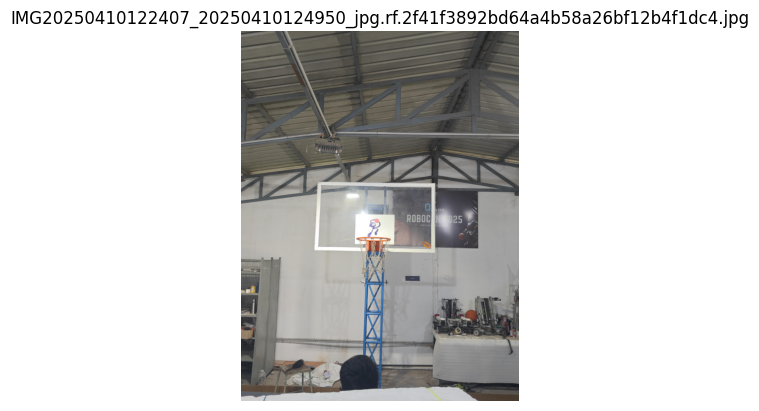

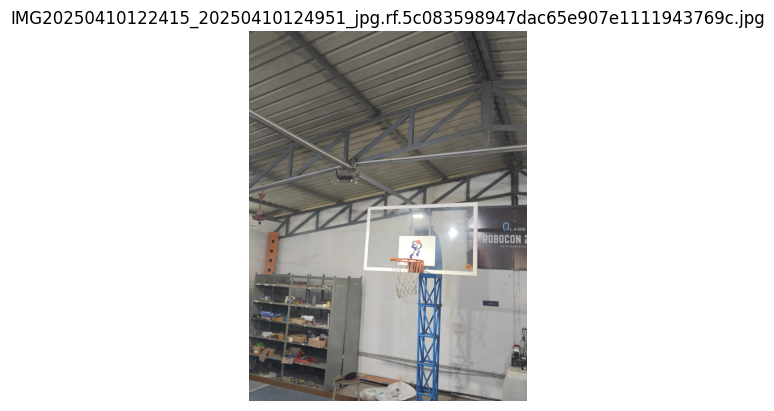

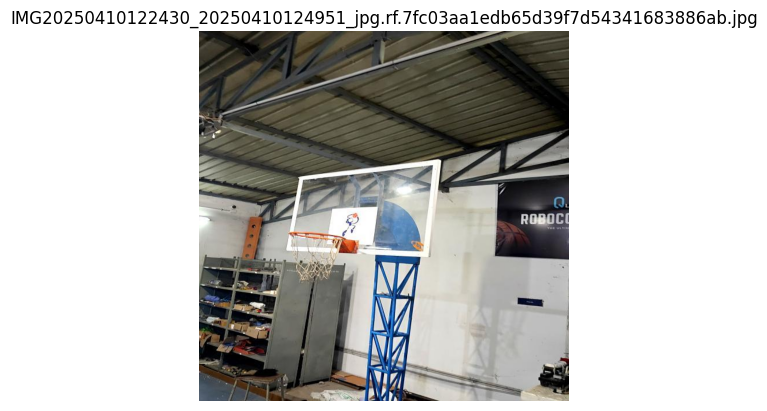

In [12]:
import matplotlib.pyplot as plt
import cv2
# train_images is image folder file path
image_file_test = os.listdir(train_images)

# check to see images in the middle of dataset

n = len(image_file_test) // 2


for i in range(n, n+3):
  img_path = os.path.join(train_images, image_file_test[i])
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(image_file_test[i])
  plt.axis('off')
  plt.show()

In [13]:
model = YOLO("yolov8n.pt")
model.train(data="/content/Basketball-Hoop-Detection--1/data.yaml", epochs=50)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Basketball-Hoop-Detection--1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1204.8±604.3 MB/s, size: 65.2 KB)


train: Scanning /content/Basketball-Hoop-Detection--1/train/labels... 1618 images, 205 backgrounds, 0 corrupt: 100%|██████████| 1618/1618 [00:00<00:00, 2314.52it/s]


train: New cache created: /content/Basketball-Hoop-Detection--1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 837.9±596.6 MB/s, size: 221.8 KB)


val: Scanning /content/Basketball-Hoop-Detection--1/valid/labels... 680 images, 47 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:00<00:00, 757.24it/s]


val: New cache created: /content/Basketball-Hoop-Detection--1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 644. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.06G      1.195      2.324      1.187          5        640: 100%|██████████| 102/102 [00:49<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:28<00:00,  1.29s/it]

                   all        680        644      0.996      0.345       0.55        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.54G      1.067       1.33       1.12          1        640: 100%|██████████| 102/102 [00:45<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.23s/it]


                   all        680        644      0.979      0.454       0.48      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.56G      1.091       1.05      1.153          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.26s/it]


                   all        680        644      0.978      0.463      0.484      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.57G      1.035     0.8541      1.124          3        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:28<00:00,  1.27s/it]


                   all        680        644      0.963      0.459      0.482      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.6G      1.068     0.7835      1.136          4        640: 100%|██████████| 102/102 [00:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.24s/it]


                   all        680        644      0.991      0.466      0.489      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.61G     0.9759     0.6876      1.099          3        640: 100%|██████████| 102/102 [00:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.484      0.469      0.488      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.63G     0.9718     0.6349      1.086          5        640: 100%|██████████| 102/102 [00:41<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.987      0.479      0.492       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.64G     0.9647      0.614      1.091          2        640: 100%|██████████| 102/102 [00:40<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.18s/it]

                   all        680        644      0.486       0.48      0.493      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.67G     0.9586     0.5984      1.093          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.25s/it]

                   all        680        644      0.491      0.477      0.491       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.67G     0.9504     0.5651      1.086          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.26s/it]

                   all        680        644      0.493      0.476      0.494       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.7G     0.9126     0.5507      1.063          2        640: 100%|██████████| 102/102 [00:42<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.25s/it]

                   all        680        644      0.493      0.476      0.493       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.71G     0.9179     0.5509      1.062          1        640: 100%|██████████| 102/102 [00:42<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        644      0.991      0.482      0.492      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.73G     0.9074     0.5519      1.066          3        640: 100%|██████████| 102/102 [00:40<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:31<00:00,  1.42s/it]

                   all        680        644      0.988      0.482      0.494      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.74G     0.9049     0.5284      1.057          5        640: 100%|██████████| 102/102 [00:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        644      0.989      0.485      0.495      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.77G     0.8843     0.5118      1.051          3        640: 100%|██████████| 102/102 [00:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.992      0.479      0.493      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.78G     0.8859     0.5115      1.052          1        640: 100%|██████████| 102/102 [00:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        644      0.994      0.476      0.492      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G     0.8789     0.5069       1.05          2        640: 100%|██████████| 102/102 [00:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        644      0.491      0.479      0.493      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.81G      0.887     0.5086      1.046          3        640: 100%|██████████| 102/102 [00:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        644      0.996      0.484      0.495      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.84G      0.872     0.5069       1.05          4        640: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        644      0.987      0.485      0.495       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.85G     0.8643      0.488      1.042          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        644      0.491      0.487      0.496      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.87G     0.8767     0.4858      1.038          4        640: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.489      0.486      0.495      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.88G     0.8371     0.4619      1.031          7        640: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.489      0.484      0.493      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.9G     0.8581     0.4776       1.04          7        640: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        644      0.496      0.484      0.496      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.91G     0.8363     0.4606       1.02          2        640: 100%|██████████| 102/102 [00:45<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        644      0.492      0.484      0.495      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.94G     0.8345     0.4603      1.029          1        640: 100%|██████████| 102/102 [00:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        644      0.491      0.484      0.495      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.95G     0.8399     0.4596      1.029          4        640: 100%|██████████| 102/102 [00:41<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.10s/it]

                   all        680        644      0.491      0.486      0.496      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.97G     0.8344      0.455      1.033          1        640: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        644       0.49      0.487      0.495      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.98G     0.8238     0.4547      1.024          4        640: 100%|██████████| 102/102 [00:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        644       0.49      0.488      0.495      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.01G     0.8143     0.4429       1.02          4        640: 100%|██████████| 102/102 [00:40<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.492       0.49      0.494      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.02G     0.8004      0.436          1          3        640: 100%|██████████| 102/102 [00:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644       0.49      0.488      0.494      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.04G     0.7987     0.4244     0.9998          4        640: 100%|██████████| 102/102 [00:43<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        644      0.491      0.484      0.496      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.05G     0.8076     0.4399      1.009          3        640: 100%|██████████| 102/102 [00:42<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.23s/it]

                   all        680        644       0.49      0.482      0.494      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.08G     0.7933     0.4179      1.012          5        640: 100%|██████████| 102/102 [00:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.21s/it]

                   all        680        644      0.494      0.483      0.495      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.08G     0.7832     0.4232     0.9996          3        640: 100%|██████████| 102/102 [00:39<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.495      0.483      0.495      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.11G     0.7911     0.4134     0.9968          3        640: 100%|██████████| 102/102 [00:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        644      0.493      0.487      0.494      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.12G     0.7736     0.4055     0.9982          6        640: 100%|██████████| 102/102 [00:41<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.22s/it]

                   all        680        644      0.494      0.484      0.495      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.14G     0.7727     0.4075     0.9937          5        640: 100%|██████████| 102/102 [00:40<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.21s/it]

                   all        680        644      0.994      0.482      0.495      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.15G     0.7672     0.3954     0.9937          4        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.25s/it]

                   all        680        644      0.989      0.484      0.493      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.18G     0.7643     0.3964     0.9942          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.25s/it]

                   all        680        644      0.494      0.485      0.496      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.19G     0.7647     0.3884     0.9969          5        640: 100%|██████████| 102/102 [00:45<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.995      0.484      0.494      0.404


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.21G     0.7222     0.3459     0.9778          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.21s/it]

                   all        680        644      0.495      0.484      0.494      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.22G     0.7182      0.342     0.9721          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        644      0.494      0.487      0.494      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.25G     0.7052     0.3384     0.9555          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        644      0.495      0.486      0.495      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.25G      0.698     0.3373     0.9599          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.18s/it]

                   all        680        644      0.493      0.485      0.494      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.28G     0.6921     0.3268     0.9538          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        644      0.493      0.484      0.495      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.29G     0.6862     0.3249     0.9534          2        640: 100%|██████████| 102/102 [00:45<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.21s/it]

                   all        680        644      0.493      0.483      0.496      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.31G     0.6796      0.317     0.9438          1        640: 100%|██████████| 102/102 [00:42<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.27s/it]


                   all        680        644      0.491      0.484      0.496      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.32G      0.686      0.323     0.9546          1        640: 100%|██████████| 102/102 [00:43<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        644      0.494      0.484      0.496      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.35G      0.665     0.3079     0.9391          2        640: 100%|██████████| 102/102 [00:53<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:31<00:00,  1.43s/it]

                   all        680        644      0.495      0.485      0.496      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.36G     0.6699     0.3117     0.9475          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:30<00:00,  1.37s/it]

                   all        680        644      0.495      0.485      0.496      0.415



50 epochs completed in 0.981 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.24s/it]


                   all        680        644      0.495      0.485      0.496      0.415
      Basket Ball Hoop        633        640      0.991       0.97      0.991       0.83
        Basketballhoop          4          4          0          0          0          0
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ece0ddb1350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [21]:
!ls runs/detect/train/weights

best.pt  last.pt


In [20]:
from google.colab import drive
import shutil

shutil.copy("/content/runs/detect/train/weights/best.pt","/content/drive/MyDrive/hoop_model.pt")

'/content/drive/MyDrive/hoop_model.pt'

In [22]:
!ls test_images1

hoop1.webp  hoop3.webp	random0.webp  random3.jpg
hoop2.jpg   hoop4.jpg	random1.webp  random4.webp



image 1/1 /content/test_images1/hoop1.webp: 640x640 1 Basket Ball Hoop, 27.6ms
Speed: 20.0ms preprocess, 27.6ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 640)
Number of hoops in image hoop1.webp is 1


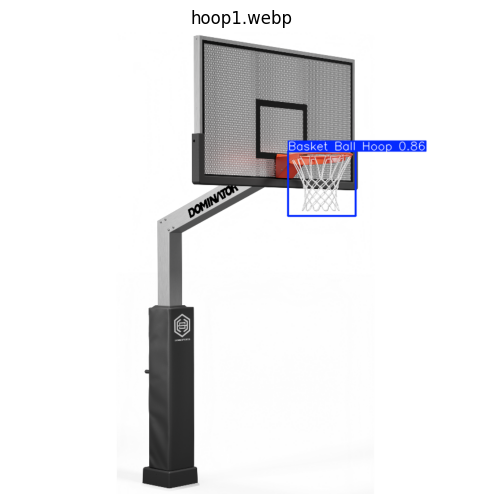


image 1/1 /content/test_images1/random1.webp: 448x640 (no detections), 56.3ms
Speed: 4.4ms preprocess, 56.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Number of hoops in image random1.webp is 0


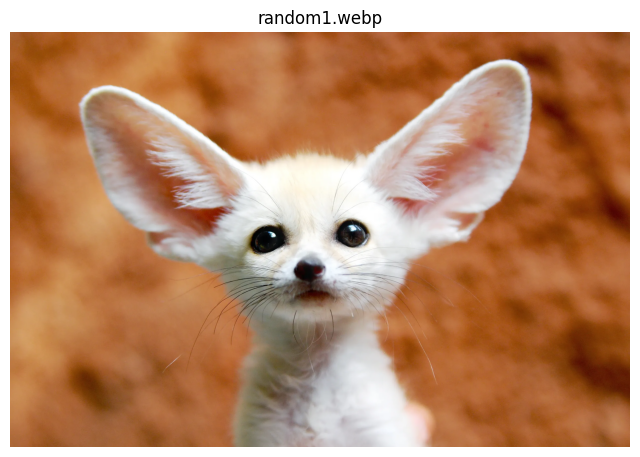


image 1/1 /content/test_images1/random3.jpg: 448x640 (no detections), 16.9ms
Speed: 6.5ms preprocess, 16.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Number of hoops in image random3.jpg is 0


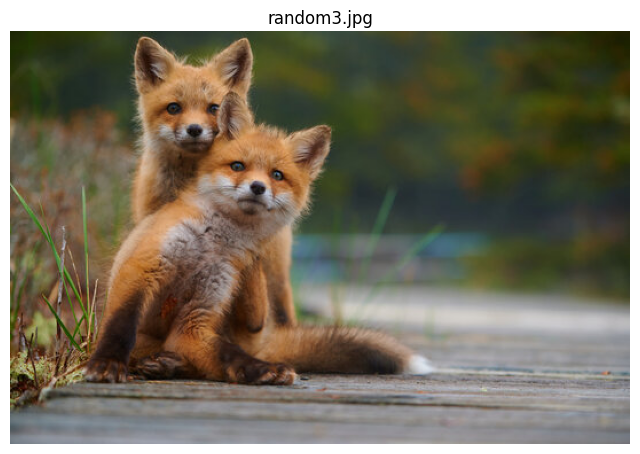


image 1/1 /content/test_images1/random0.webp: 640x512 (no detections), 174.9ms
Speed: 4.2ms preprocess, 174.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 512)
Number of hoops in image random0.webp is 0


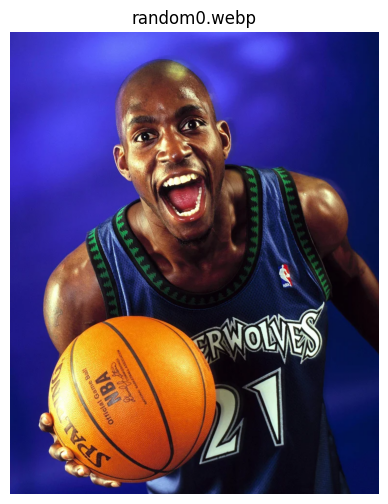


image 1/1 /content/test_images1/hoop3.webp: 640x640 2 Basket Ball Hoops, 11.5ms
Speed: 5.3ms preprocess, 11.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Number of hoops in image hoop3.webp is 2


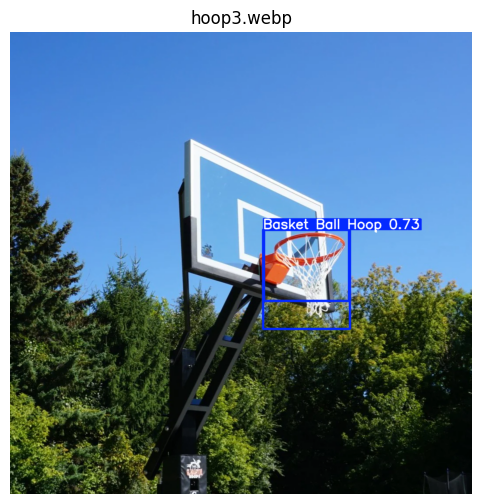


image 1/1 /content/test_images1/hoop4.jpg: 640x352 1 Basket Ball Hoop, 37.0ms
Speed: 2.4ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)
Number of hoops in image hoop4.jpg is 1


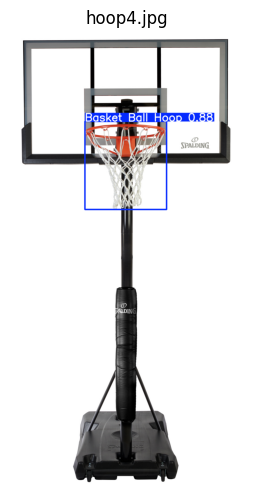


image 1/1 /content/test_images1/hoop2.jpg: 480x640 2 Basket Ball Hoops, 54.2ms
Speed: 4.7ms preprocess, 54.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Number of hoops in image hoop2.jpg is 2


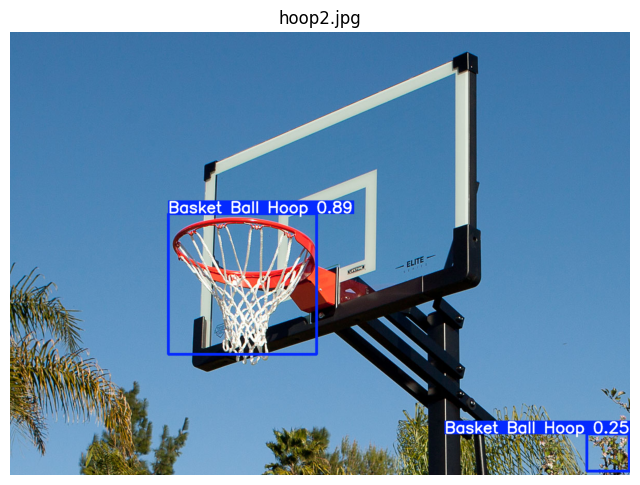


image 1/1 /content/test_images1/random4.webp: 480x640 (no detections), 8.8ms
Speed: 4.1ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Number of hoops in image random4.webp is 0


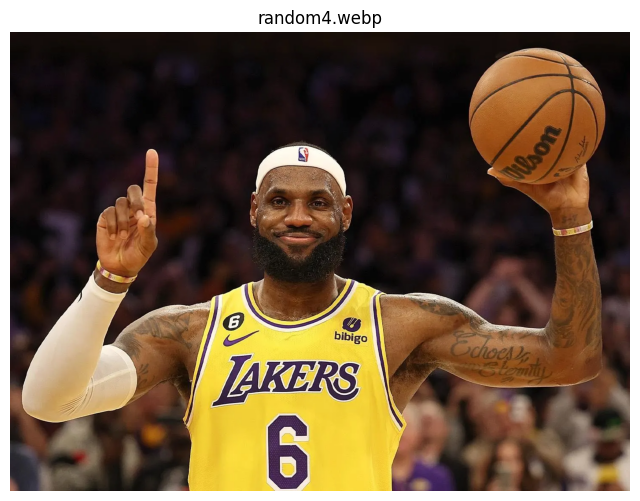

In [26]:
test_images = 'test_images1'
test_path = os.listdir(test_images)

test_files = [img for img in test_path if img.endswith((".jpg", ".jpeg", ".png", ".webp"))]

for img in test_files:
  test_img_path = os.path.join(test_images, img)
  res = model(test_img_path)[0]
  imgs_w_boxes = res.plot()
  plt.figure(figsize=(8,6))
  plt.imshow(cv2.cvtColor(imgs_w_boxes, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(img)

  hoop_count = sum(1 for c in res.boxes.cls if c == 0)
  print(f"Number of hoops in image {img} is {hoop_count}")
  plt.show()